In [3]:
# 1. Import thư viện cần thiết
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
from sklearn.svm import SVR

In [26]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('/content/drive/MyDrive/Data Analysis/SSI_Stock.csv')
df1 = df.reset_index()['Price']

# 3. Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# 5. Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# 6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features] which is required for SVR
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1]))

# 8. Define SVR Model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# 9. Dự báo dữ liệu test, val bằng mô hình SVR
y_pred = svr_model.predict(X_test)
y_pred_val = svr_model.predict(X_val)

# 10. Chuẩn hóa dữ liệu y_pred, y_pred_val
y_pred = y_pred.reshape(-1, 1)
y_pred_val = y_pred_val.reshape(-1, 1)
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

# 11. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 14744.664968182955
Testing RMSE: 14703.555094939604


In [27]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

svr_model = SVR(kernel='rbf')

# Reshape lại các mảng dữ liệu
X_train_copy = np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1]))
y_train_copy = np.reshape(y_train, newshape=(y_train.shape[0],))

X_test_copy = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1]))
y_test_copy = np.reshape(y_test, newshape=(y_test.shape[0],))

# Huấn luyện mô hình SVR
svr_model.fit(X_train_copy, y_train_copy)

# Dự báo trên tập test
predictions = svr_model.predict(X_test_copy)
predictions = scaler.inverse_transform([predictions])[0]

# Tính toán các chỉ số MAPE, MAE và RMSE
mape = mean_absolute_percentage_error(y_test_copy, predictions)
mae = mean_absolute_error(y_test_copy, predictions)
rmse = np.sqrt(np.mean(((predictions - y_test_copy) ** 2)))

print('RMSE:', rmse)
print('MAPE:', mape)
print('MAE:', mae)

RMSE: 14703.387438431624
MAPE: 31447.231678074033
MAE: 14703.387390020465


ValueError: ignored

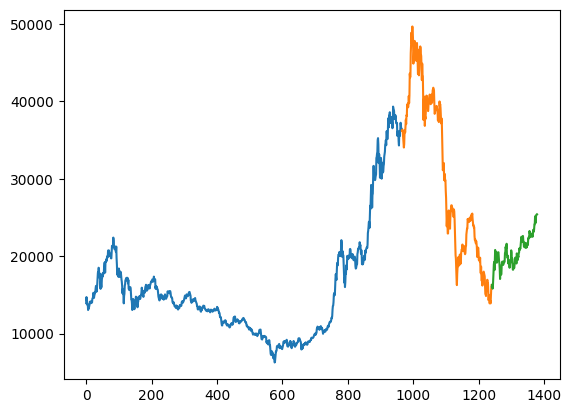

In [22]:

# Vẽ đồ thị
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data))

val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index, scaler.inverse_transform(val_data))
plt.plot(val_data_index, y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index, scaler.inverse_transform(lst_output))
plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred', 'Predict30days'])
plt.show()